# Twitter Sentiment Analysis

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



# **Table of Contents**


1. Exploratory data analysis
2. Prepare data
3. Process data
4. Encode data and cleaning
5. Naive Bayes Model
6. Results
7. Confusion matrix
8. Classification report
9. ROC - AUC
10. Conclusion


**- Problem: Find out and compare the sentiment for computer games. Gives insigne which game is currentyl popular and unpopular**


**- Data: Collected from twitter. Prelabeled sentences (positive, negative, neutral or irrelevant label)**

**Games:**


Borderlands, Tom Clancy's Rainbow Six, Madden NFL, League of Legends, Call of Duty, Call of Duty Black Ops Cold War, Apex Legends, World of Warcraft, Dota 2, NBA 2K, Tom Clancy's Ghost Recon, Battlefield, FIFA, Overwatch, Cyberpunk 2077, CS-GO (Counter-Strike: Global Offensive), Grand Theft Auto (GTA), Hearthstone, PlayerUnknown's Battlegrounds (PUBG), Fortnite, Red Dead Redemption (RDR), Assassin's Creed.

Import the dataset and all the necessary libraries

In [2]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")



# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# import dataset
df_sentiment = pd.read_csv('/kaggle/input/tsa-dataset/twitter_training.csv')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


# **1. Exploratory data analysis** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)


Now we will check the shape of the dataset, We will look what it contains, the column names, what it contains in the  columns.

In [3]:
df_sentiment.shape

(74681, 4)

In [4]:
df_sentiment.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [5]:
pd.set_option('display.max_colwidth', None)

df_sentiment

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,"
1,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,"
2,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,"
3,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,"
4,2401,Borderlands,Positive,"im getting into borderlands and i can murder you all,"
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my Mac is like 6 years behind Nvidia drivers and I have no idea how I did not notice
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is 6 years behind on Nvidia drivers and I have no idea how I didn't notice
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac is now 6 years behind on Nvidia drivers and I have no idea how he didn’t notice
74679,9200,Nvidia,Positive,Just realized between the windows partition of my Mac is like being 6 years behind on Nvidia drivers and cars I have no fucking idea how I ever didn ’ t notice


In [6]:
# Count of unique games per GameName
game_counts = df_sentiment['Borderlands'].value_counts()

# Display the counts
print(game_counts)


Borderlands
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)   

In [7]:
# Count of unique games per GameName
game_counts = df_sentiment['Positive'].value_counts()

# Display the counts
print(game_counts)


Positive
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


In [8]:
df_sentiment.describe(include='all')

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
count,74681.000000,74681,74681,73995
unique,NaN,32,4,69490
top,NaN,TomClancysRainbowSix,Negative,
freq,NaN,2400,22542,172
mean,6432.640149,NaN,NaN,NaN
std,3740.423819,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


# **2. Prepare data** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)


In this part we will rename the column names to better fit our need

We will remove the the rows that do not contain computer games

We will remove missing values by deleting the rows as we have enough data



Rename the columns

In [9]:
df_sentiment.columns = ['EntryID', 'GameName', 'Sentiment', 'Text']


Remove the non games from the mage columns

In [10]:
# List of non-game names to be removed
non_game_names = [
    'Microsoft', 'Verizon', 'Facebook', 'johnson & johnson', 'Amazon', 
    'Home Depot', 'Xbox (X series)', 'PlayStation 5 (PS5)', 'Nvidia', 'Google'
]

# Filter the DataFrame to exclude rows with these non-game names
df_sentiment = df_sentiment[~df_sentiment['GameName'].isin(non_game_names)]

# Now df_sentiment_filtered contains only rows with actual game names

In [11]:
# Count of unique games per GameName
game_counts2 = df_sentiment['GameName'].value_counts()

# Display the counts
print(game_counts2)

GameName
TomClancysRainbowSix                 2400
MaddenNFL                            2400
CallOfDuty                           2394
LeagueOfLegends                      2394
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
Battlefield                          2346
TomClancysGhostRecon                 2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
PlayStation5(PS5)                    2310
HomeDepot                            2310
CS-GO                                2304
Cyberpunk2077                        2304
GrandTheftAuto(GTA)                  2304
Hearthstone                          2298
Borderlands                          2285
PlayerUnknownsBattlegrounds(PUBG)    2274
Fortnite                 

In [12]:
df_sentiment.shape

(60617, 4)

See after if the same entry ids and text have duplicate have similar words. Or find other fix

In [13]:
#df_sentiment = df_sentiment.drop_duplicates(subset='EntryID')


Fix missing values. Enough data jsut drop it

In [14]:
missing_values = df_sentiment.isna().sum()
missing_values

EntryID        0
GameName       0
Sentiment      0
Text         531
dtype: int64

Drop the rows with missing thext as dataset is large enough

In [15]:
# Remove rows with any missing values
df_sentiment = df_sentiment.dropna()

# Check for missing values again to confirm
missing_values = df_sentiment.isna().sum()
print("Missing values after removal:\n", missing_values)

Missing values after removal:
 EntryID      0
GameName     0
Sentiment    0
Text         0
dtype: int64


Remove the irrelevant words

In [16]:
# Filter out 'irrelevant' and 'neutral' rows from the same DataFrame
df_sentiment = df_sentiment[~df_sentiment['Sentiment'].isin(['Irrelevant'])]

In [17]:
df_sentiment.shape

(49038, 4)

# **3. Processing data** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)


Data processing steps:

    - Tokenization
    
    - Removing stop words
    
    - Removing non alphabetic
    
    - Use stemming to remove the ending like (ing..)
    
We will vizualise the data:

    - Check the frequncy of positive, negative, neutral and irrelevant words 

    - Check whece words are more frequent
    
    - Check the frequency of words in sentiment categories
    
 

tokenize, remove stop words, remove non alpha, steam words.

In [18]:

# Define preprocessing functions
def tokenize(text):
    return word_tokenize(text)

def remove_stop_words(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

def remove_non_alphabetic(tokens):
    return [word for word in tokens if word.isalpha()]

def stem_words(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in tokens]

def preprocess_text(text):
    tokens = tokenize(text)
    tokens = remove_stop_words(tokens)
    tokens = remove_non_alphabetic(tokens)
    tokens = stem_words(tokens)
    return tokens

# Apply preprocessing to the 'Text' column
df_sentiment['Processed_Text'] = df_sentiment['Text'].apply(preprocess_text)


In [19]:
df_sentiment

,EntryID,GameName,Sentiment,Text,Processed_Text
0,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,","[I, come, border, I, kill]"
1,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,","[im, get, borderland, kill]"
2,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,","[im, come, borderland, murder]"
3,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,","[im, get, borderland, murder]"
4,2401,Borderlands,Positive,"im getting into borderlands and i can murder you all,","[im, get, borderland, murder]"
...,...,...,...,...,...
72378,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point ift.tt / 36QWteH,"[tom, clanci, ghost, recon, choke, point]"
72379,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point i.tt / 36QWteH,"[tom, clanci, ghost, recon, choke, point]"
72380,11200,TomClancysGhostRecon,Neutral,Tom lin Ghost Recon: Choke Point ift.tt/36QWteH,"[tom, lin, ghost, recon, choke, point]"
72381,11200,TomClancysGhostRecon,Neutral,In Tom Clancy'A s The Ghost House Recon : Choke Point ift. tt / 36QWteH,"[In, tom, the, ghost, hous, recon, choke, point, ift, tt]"


Visualize data


In [20]:
from collections import Counter
import itertools

# Assuming 'Processed_Text' is a list of words for each row
all_words = list(itertools.chain(*df_sentiment['Processed_Text']))
word_counts = Counter(all_words)

# Filter out words that appear only once
repeating_words = {word: count for word, count in word_counts.items() if count > 1}


In [21]:
sentiment_counts = df_sentiment['Sentiment'].value_counts()


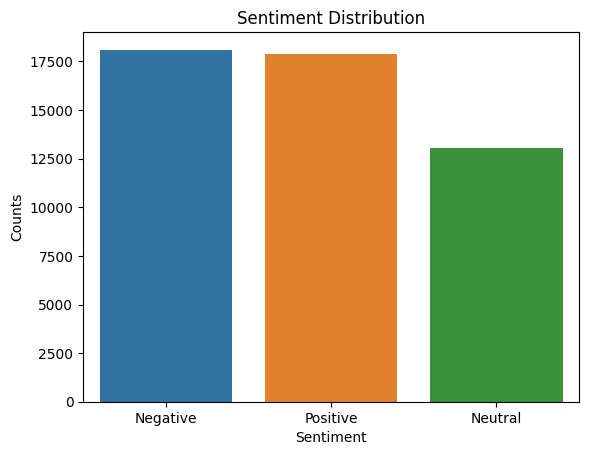

In [22]:


# Assuming 'sentiment_counts' is your Series with sentiment counts
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.ylabel('Counts')
plt.xlabel('Sentiment')
plt.show()


In [23]:


# # Assuming 'all_words' is a list of all words in your processed text
# wordcloud = WordCloud(width = 800, height = 800, 
#                       background_color ='white', 
#                       min_font_size = 10).generate(' '.join(all_words))

# # Plot the WordCloud image                        
# plt.figure(figsize = (8, 8), facecolor = None) 
# plt.imshow(wordcloud) 
# plt.axis("off") 
# plt.tight_layout(pad = 0) 
  
# plt.show()


In [24]:
df_sentiment

,EntryID,GameName,Sentiment,Text,Processed_Text
0,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,","[I, come, border, I, kill]"
1,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,","[im, get, borderland, kill]"
2,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,","[im, come, borderland, murder]"
3,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,","[im, get, borderland, murder]"
4,2401,Borderlands,Positive,"im getting into borderlands and i can murder you all,","[im, get, borderland, murder]"
...,...,...,...,...,...
72378,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point ift.tt / 36QWteH,"[tom, clanci, ghost, recon, choke, point]"
72379,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point i.tt / 36QWteH,"[tom, clanci, ghost, recon, choke, point]"
72380,11200,TomClancysGhostRecon,Neutral,Tom lin Ghost Recon: Choke Point ift.tt/36QWteH,"[tom, lin, ghost, recon, choke, point]"
72381,11200,TomClancysGhostRecon,Neutral,In Tom Clancy'A s The Ghost House Recon : Choke Point ift. tt / 36QWteH,"[In, tom, the, ghost, hous, recon, choke, point, ift, tt]"


In [25]:
from collections import defaultdict, Counter

# Initialize dictionaries to store word counts for each sentiment
positive_words = defaultdict(int)
negative_words = defaultdict(int)
neutral_words = defaultdict(int)

# Iterate over the DataFrame and update the counts
for _, row in df_sentiment.iterrows():
    sentiment = row['Sentiment']
    for word in row['Processed_Text']:
        if sentiment == 'Positive':
            positive_words[word] += 1
        elif sentiment == 'Negative':
            negative_words[word] += 1
        elif sentiment == 'Neutral':
            neutral_words[word] += 1

# Now, find the most common words for each sentiment
most_common_positive = Counter(positive_words).most_common(30)
most_common_negative = Counter(negative_words).most_common(30)
most_common_neutral = Counter(neutral_words).most_common(30)


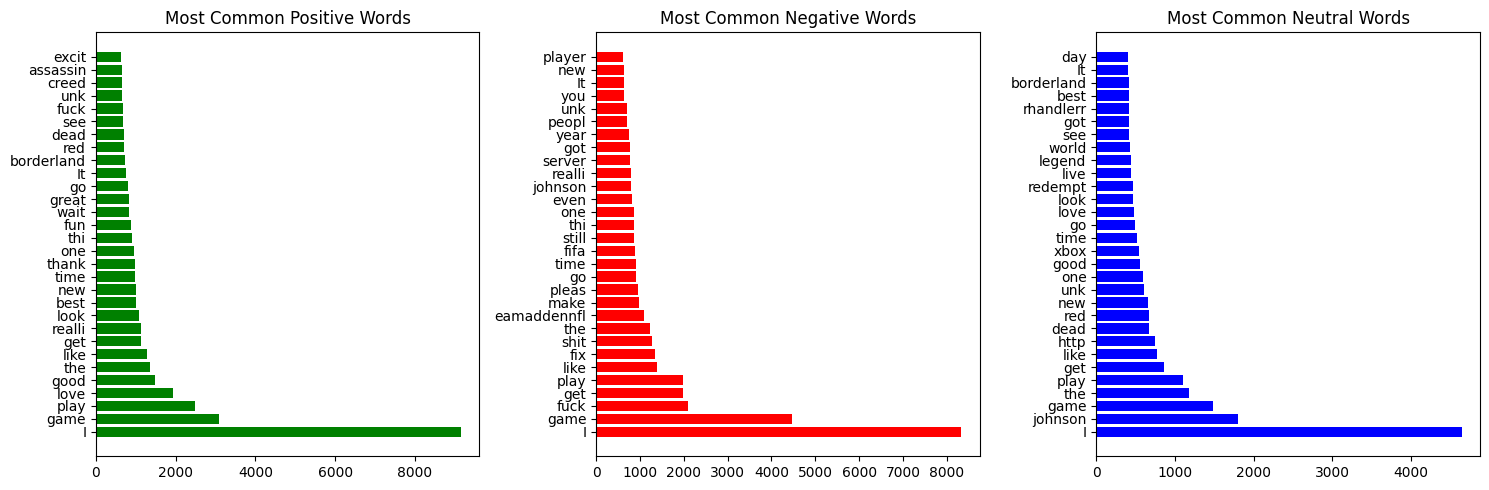

In [26]:
import matplotlib.pyplot as plt

# Function to plot a horizontal bar chart for sentiment words
def plot_most_common_words(most_common, title, ax, color):
    words, counts = zip(*most_common)
    ax.barh(words, counts, color=color)
    ax.set_title(title)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting each sentiment
plot_most_common_words(most_common_positive, 'Most Common Positive Words', axes[0], 'green')
plot_most_common_words(most_common_negative, 'Most Common Negative Words', axes[1], 'red')
plot_most_common_words(most_common_neutral, 'Most Common Neutral Words', axes[2], 'blue')

plt.tight_layout()
plt.show()


In [27]:
# Printing the two most common words for each sentiment
print("Two Most Common Positive Words:", most_common_positive[:2])
print("Two Most Common Negative Words:", most_common_negative[:2])
print("Two Most Common Neutral Words:", most_common_neutral[:2])


Two Most Common Positive Words: [('I', 9159), ('game', 3079)]
Two Most Common Negative Words: [('I', 8336), ('game', 4460)]
Two Most Common Neutral Words: [('I', 4650), ('johnson', 1804)]


# **4. Encoding and cleaning** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)


For the encoding of GameNames and Sentiment we will use label encoding. 
It will label each Category with a number, we have relativly small amount of categories and mostly the distribution between them is even

For the sentences we will encode each word using TF-IDF (term frequency - invers document frequency). It  evaluates how important a word is to a document in a collection of documents. It is calculated in two parts. Part one find the number of times a word apperas in a document divided by total number of term in the document. Then the second part calculates the total number of documents in all documents divided by the number of documents with that term. Then all is multiplied together. It is usefull in large dataset as it captures the most significant in each document. 

At the end, we just remove the not needed columns.

In [28]:
df_sentiment.shape

(49038, 5)

In [29]:

# Initialize the label encoder
game_name_encoder = LabelEncoder()

# Fit and transform the GameName column
df_sentiment['GameName_Encoded'] = game_name_encoder.fit_transform(df_sentiment['GameName'])

# Get the mapping of game names to encoded numbers
game_name_mapping = dict(zip(game_name_encoder.classes_, game_name_encoder.transform(game_name_encoder.classes_)))

print("Game Name to Number Mapping:")
print(game_name_mapping)

Game Name to Number Mapping:
{'ApexLegends': 0, 'AssassinsCreed': 1, 'Battlefield': 2, 'Borderlands': 3, 'CS-GO': 4, 'CallOfDuty': 5, 'CallOfDutyBlackopsColdWar': 6, 'Cyberpunk2077': 7, 'Dota2': 8, 'FIFA': 9, 'Fortnite': 10, 'GrandTheftAuto(GTA)': 11, 'Hearthstone': 12, 'HomeDepot': 13, 'LeagueOfLegends': 14, 'MaddenNFL': 15, 'NBA2K': 16, 'Overwatch': 17, 'PlayStation5(PS5)': 18, 'PlayerUnknownsBattlegrounds(PUBG)': 19, 'RedDeadRedemption(RDR)': 20, 'TomClancysGhostRecon': 21, 'TomClancysRainbowSix': 22, 'WorldOfCraft': 23, 'Xbox(Xseries)': 24, 'johnson&johnson': 25}


In [30]:
# Initialize another label encoder for Sentiment
sentiment_encoder = LabelEncoder()

# Fit and transform the Sentiment column
df_sentiment['Sentiment_Encoded'] = sentiment_encoder.fit_transform(df_sentiment['Sentiment'])

# Get the mapping of sentiment labels to encoded numbers
label_mapping = dict(zip(sentiment_encoder.classes_, sentiment_encoder.transform(sentiment_encoder.classes_)))

print("Sentiment to Number Mapping:")
print(label_mapping)

Sentiment to Number Mapping:
{'Negative': 0, 'Neutral': 1, 'Positive': 2}


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join the list of words in Processed_Text into a single string per row
df_sentiment['Processed_Text_Joined'] = df_sentiment['Processed_Text'].apply(lambda x: ' '.join(x))

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the Processed_Text_Joined column
tfidf_matrix = tfidf_vectorizer.fit_transform(df_sentiment['Processed_Text_Joined'])


Clean the columns that are not needede

In [32]:
df_sentiment

,EntryID,GameName,Sentiment,Text,Processed_Text,GameName_Encoded,Sentiment_Encoded,Processed_Text_Joined
0,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,","[I, come, border, I, kill]",3,2,I come border I kill
1,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,","[im, get, borderland, kill]",3,2,im get borderland kill
2,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,","[im, come, borderland, murder]",3,2,im come borderland murder
3,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,","[im, get, borderland, murder]",3,2,im get borderland murder
4,2401,Borderlands,Positive,"im getting into borderlands and i can murder you all,","[im, get, borderland, murder]",3,2,im get borderland murder
...,...,...,...,...,...,...,...,...
72378,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point ift.tt / 36QWteH,"[tom, clanci, ghost, recon, choke, point]",21,1,tom clanci ghost recon choke point
72379,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point i.tt / 36QWteH,"[tom, clanci, ghost, recon, choke, point]",21,1,tom clanci ghost recon choke point
72380,11200,TomClancysGhostRecon,Neutral,Tom lin Ghost Recon: Choke Point ift.tt/36QWteH,"[tom, lin, ghost, recon, choke, point]",21,1,tom lin ghost recon choke point
72381,11200,TomClancysGhostRecon,Neutral,In Tom Clancy'A s The Ghost House Recon : Choke Point ift. tt / 36QWteH,"[In, tom, the, ghost, hous, recon, choke, point, ift, tt]",21,1,In tom the ghost hous recon choke point ift tt


In [33]:
df_sentiment = df_sentiment.drop(columns=['EntryID', 'GameName', 'Sentiment', 'Text', 'Processed_Text', 'Processed_Text_Joined'])


In [34]:
df_sentiment.head()

,GameName_Encoded,Sentiment_Encoded
0,3,2
1,3,2
2,3,2
3,3,2
4,3,2


# **5. Naive Bayes model** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)


Multinomial Naive Bayes is a variant of the Naive Bayes algorithm, which is a simple yet effective probabilistic machine learning model often used for classification tasks. It's based on Bayes' Theorem which is assuming independence between predictors.

In [35]:
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle


# Combine the TF-IDF features with the encoded GameName and Sentiment
X = hstack((tfidf_matrix, df_sentiment[['GameName_Encoded', 'Sentiment_Encoded']].values))
y = df_sentiment['Sentiment_Encoded']  # assuming you want to predict Sentiment

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = nb_classifier.predict(X_test)


A good practice would also be to create a validation set where we can fine tune or model. 

example:


- First split: Splitting into training and remaining data (validation + test):

    X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.4, random_state=42)

- Second split: Splitting the remaining data into validation and test sets

    X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

# **6. Results** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)

### Accuracy score

In [36]:

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predictions)))

Model accuracy score: 0.8982


Accuracy score measures the proportion of total correct predictions. Callculated by number of correct prediction divided by total number of predictions.

Accuracy = TP + TN / All predictions


Also it does not penalize for false negatives and false positive.

### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting. 

In [37]:


# Evaluate model accuracy on the test set
print('Test-set accuracy score: {0:0.4f}'.format(accuracy_score(y_test, predictions)))

# Make predictions on the training set
y_pred_train = nb_classifier.predict(X_train)

# Evaluate model accuracy on the training set
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

Test-set accuracy score: 0.8982
Training-set accuracy score: 0.9209


The training-set accuracy score is 0.9209 while the test-set accuracy to be 0.8982. There is a small gap between training and test accuracy. This suggest that the model is generalizing well to unseen data and tere is no sign of overfitting


### Compare model accuracy with null accuracy


So, the model accuracy is 0.8083. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set. 


In [38]:
# check class distribution in test set

y_test.value_counts()


Sentiment_Encoded
0    5450
2    5293
1    3969
Name: count, dtype: int64

We can see that the occurences of most frequent class is 5450. So, we can calculate null accuracy by dividing 5450 by total number of occurences.


In [39]:
# check null accuracy score

null_accuracy = (5450/(5450+5293+3969))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.3704


We can see that our model accuracy score is 0.89 but null accuracy score is 0.37. So, we can conclude that the model is learning something meaningful from the data. As 37% is the possiblity that the model predict the most frequent class by pure chance.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making. It does not penalize tor false positives.


We have another tool called `Confusion matrix`


# **7. Confusion matrix** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

The confusion matrix shows TP0 + TP1 + TP2 = Total correct predictions and all other non-diagonal elements summed up = Total incorrect predictions.

In this case, we have:

- True Positives for Class 0 (Neutral) - TP0 (Actual Neutral and Predict Neutral)
- True Positives for Class 1 (Negative) - TP1 (Actual Negative and Predict Negative)
- True Positives for Class 2 (Positive) - TP2 (Actual Positive and Predict Positive)

- False Positives for Class 0 (Predicted as Neutral but not Neutral) - Sum of non-diagonal elements in the first column (excluding TP0)
- False Positives for Class 1 (Predicted as Negative but not Negative) - Sum of non-diagonal elements in the second column (excluding TP1)
- False Positives for Class 2 (Predicted as Positive but not Positive) - Sum of non-diagonal elements


In [40]:
# Create the confusion matrix
cm = confusion_matrix(y_test, predictions)

print('Confusion matrix\n\n', cm)

# For multiclass, we have to consider each class separately.
print('\nMetrics for Class 0 (Neutral):')
print('True Positives:', cm[0, 0])
print('True Negatives:', cm[1, 1] + cm[1, 2] + cm[2, 1] + cm[2, 2])
print('False Positives:', cm[0, 1] + cm[0, 2])
print('False Negatives:', cm[1, 0] + cm[2, 0])

print('\nMetrics for Class 1 (Negative):')
print('True Positives:', cm[1, 1])
print('True Negatives:', cm[0, 0] + cm[0, 2] + cm[2, 0] + cm[2, 2])
print('False Positives:', cm[1, 0] + cm[1, 2])
print('False Negatives:', cm[0, 1] + cm[2, 1])

print('\nMetrics for Class 2 (Positive):')
print('True Positives:', cm[2, 2])
print('True Negatives:', cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1])
print('False Positives:', cm[2, 0] + cm[2, 1])
print('False Negatives:', cm[0, 2] + cm[1, 2])

Confusion matrix

 [[5360   23   67]
 [   0 2737 1232]
 [   0  175 5118]]

Metrics for Class 0 (Neutral):
True Positives: 5360
True Negatives: 9262
False Positives: 90
False Negatives: 0

Metrics for Class 1 (Negative):
True Positives: 2737
True Negatives: 10545
False Positives: 1232
False Negatives: 198

Metrics for Class 2 (Positive):
True Positives: 5118
True Negatives: 8120
False Positives: 175
False Negatives: 1299


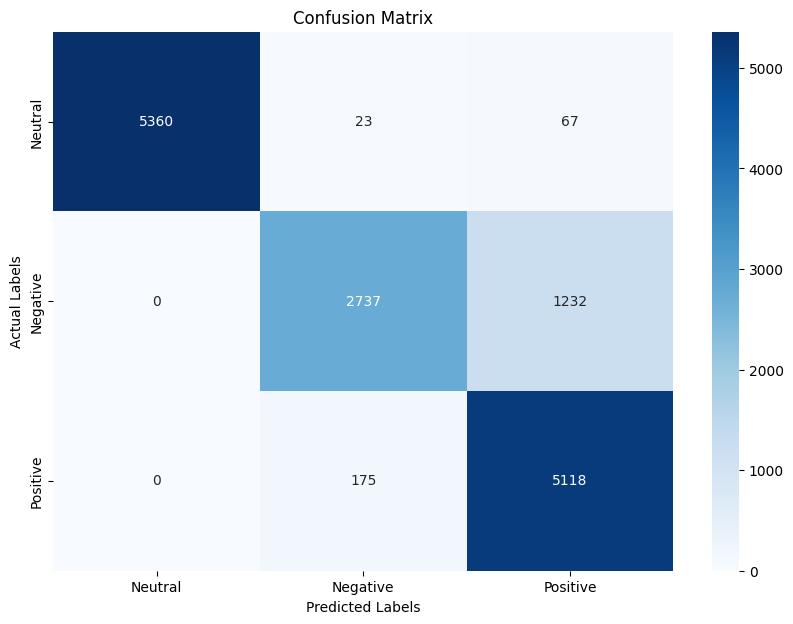

In [41]:

# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Neutral', 'Negative', 'Positive'], yticklabels=['Neutral', 'Negative', 'Positive'])
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()


**Class 0 (Neutral)**

True Positives: 5360 (Neutral correctly identified as Neutral)

False Positives: 90 (Non-Neutral incorrectly identified as Neutral)

False Negatives: 0 (Neutral incorrectly identified as Non-Neutral)

True Negatives: This is a bit complex to calculate directly from the information given. It's the sum of all the instances that are correctly identified as not Neutral.

**Class 1 (Negative)**

True Positives: 2737 (Negative correctly identified as Negative)

False Positives: 1232 (Non-Negative incorrectly identified as Negative)

False Negatives: 198 (Negative incorrectly identified as Non-Negative)

True Negatives: Correctly identified as not Negative (Given as 10545)

**Class 2 (Positive)**

True Positives: 5118 (Positive correctly identified as Positive)

False Positives: 175 (Non-Positive incorrectly identified as Positive)

False Negatives: 1299 (Positive incorrectly identified as Non-Positive)

True Negatives: Correctly identified as not Positive (Given as 8120)

**Overall Model Performance**

Total Correct Predictions: 13215 (sum of True Positives for all classes: 5360 + 2737 + 5118 = 13215)

Total Incorrect Predictions: 2994 (Sum of false positive and false negative: 1497+1497=2994) 

Sum of False Positives for all classes: 
90+1232+175=1497

Sum of False Negatives for all classes: 
0+198+1299=1497


The model is very effective at identifying Neutral sentiments (Class 0), evidenced by a high number of True Positives and no False Negatives.

The model shows some difficulty in accurately classifying Negative (Class 1) and Positive (Class 2) sentiments, indicated by the higher numbers of False Positives and False Negatives.

The high number of False Negatives for Positive sentiments suggests the model often misses identifying positive sentiments, likely misclassifying them as neutral or negative.

The total incorrect predictions across all classes are 2994, showing the model's overall error rate and indicating areas for potential improvement.


# **8. Classification report** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)




**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. 

- Recall or sensitivity is the model ability to correctly indetify a class. Higher sensitivity means  model is good at identifying class.

- Specificity is the models ability to correctly reject classes other than the target class. Higher specificity means that the model rarely makes false alarms for that class.



In [42]:
# Calculating classification accuracy for a multiclass model
cm = confusion_matrix(y_test, predictions)

### Classification error

The classification error is then calculated by dividing the total number of incorrect predictions by the total number of predictions.
This value represents the proportion of predictions that the model got wrong.

In [43]:
# Calculation of classification error
total_predictions = cm.sum()
total_incorrect_predictions = cm.sum(axis=0) - np.diag(cm)
total_incorrect_predictions = total_incorrect_predictions.sum()

classification_error = total_incorrect_predictions / total_predictions
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1018


### Recall


Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). **Recall** is also called **Sensitivity**.


**Recall** identifies the proportion of correctly predicted actual positives.


Mathematically, recall can be given as the ratio of `TP to (TP + FN)`.


In [44]:
# Initialize arrays to store recall for each class
recalls = np.zeros(cm.shape[0])

# Calculating recall for each class
for i in range(cm.shape[0]):
    TP = cm[i, i]
    FN = cm[i, :].sum() - TP
    recalls[i] = TP / float(TP + FN) if (TP + FN) != 0 else 0

# Average recall across all classes
average_recall = np.mean(recalls)

print('Recall or Sensitivity for each class:', recalls)
print('Average Recall or Sensitivity : {:.4f}'.format(average_recall))

Recall or Sensitivity for each class: [0.98348624 0.68959436 0.96693746]
Average Recall or Sensitivity : 0.8800


**Sensitivity**

neutral: 0.98348624 

negative: 0.68959436 

positive: 0.96693746


Average: 0.8800

### Specificity

Specificity, often used in the context of binary classification, is the measure of a model's ability to correctly identify true negatives. It answers the question: "Of all the instances that are truly negatives, how many did the model correctly identify?"

It is give by the ration of true negatives and sum of true negatives and false postivies

Specificity is the models ability to correctly reject classes other than the target class. Higher specificity means that the model rarely makes false alarms for that class.



In [45]:
# Initialize arrays to store specificity for each class
specificities = np.zeros(cm.shape[0])

# Calculating specificity for each class
for i in range(cm.shape[0]):
    TN = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
    FP = cm[:, i].sum() - cm[i, i]
    specificities[i] = TN / float(TN + FP) if (TN + FP) != 0 else 0

# Average specificity across all classes
average_specificity = np.mean(specificities)

print('Specificity for each class:', specificities)
print('Average Specificity : {:.4f}'.format(average_specificity))

Specificity for each class: [1.         0.98156939 0.86208727]
Average Specificity : 0.9479


**Specificity**

neutral: 1 

negative: 0.98156939  

positive: 0.86208727


Average: 0.9479

rade-offs: Increasing specificity (reducing false positives) can sometimes lead to a decrease in sensitivity or recall (the ability to identify true positives), especially in models where there is a delicate balance between false positives and false negatives.

### Precision


**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP). 


So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.



Mathematically, precision can be defined as the ratio of `TP to (TP + FP)`.


In [46]:
# Initialize an array to store precision for each class
precisions = np.zeros(cm.shape[0])

# Calculating precision for each class
for i in range(cm.shape[0]):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    precisions[i] = TP / float(TP + FP) if (TP + FP) != 0 else 0

# Average precision across all classes
average_precision = np.mean(precisions)

print('Precision for each class:', precisions)
print('Average Precision : {:.4f}'.format(average_precision))

Precision for each class: [1.         0.93253833 0.79756896]
Average Precision : 0.9100


**Precision**

neutral: 1 

negative: 0.93253833   

positive: 0.79756896


Average: 0.9100

### f1-score


**f1-score** is the weighted harmonic mean of precision and recall. The best possible **f1-score** would be 1.0 and the worst 
would be 0.0.  **f1-score** is the harmonic mean of precision and recall. So, **f1-score** is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of `f1-score` should be used to 
compare classifier models, not global accuracy.


In [47]:
# Assuming y_test and predictions are already defined
print(classification_report(y_test, predictions))

# Calculating classification accuracy for a multiclass model
cm = confusion_matrix(y_test, predictions)

# True Positives (TP) are the diagonal elements
TP = np.diag(cm).sum()

# True Negatives (TN) are not directly used in multiclass classification accuracy

# False Positives (FP) for each class are all the elements in the predicted class column, excluding the TP for that class
FP = cm.sum(axis=0) - np.diag(cm)

# False Negatives (FN) for each class are all the elements in the actual class row, excluding the TP for that class
FN = cm.sum(axis=1) - np.diag(cm)

# Total number of instances
total = cm.sum()

# Classification accuracy calculation
classification_accuracy = TP / total


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5450
           1       0.93      0.69      0.79      3969
           2       0.80      0.97      0.87      5293

    accuracy                           0.90     14712
   macro avg       0.91      0.88      0.89     14712
weighted avg       0.91      0.90      0.90     14712



**Class 0 (Neutral)**

Precision: 1.00 - The model correctly identifies 100% of the instances it labels as Class 0.

Recall: 0.98 - The model correctly identifies 98% of the actual instances of Class 0.

F1-Score: 0.99 - This high F1-score indicates a very good balance of precision and recall for Class 0.

**Class 1 (Negative)**

Precision: 0.93 - The model correctly identifies 93% of the instances it labels as Class 1.

Recall: 0.69 - The model correctly identifies 69% of the actual instances of Class 1.

F1-Score: 0.79 - The lower F1-score compared to Class 0 indicates a less balanced performance in precision and recall for Class 1.

**Class 2 (Positive)**

Precision: 0.80 - The model correctly identifies 80% of the instances it labels as Class 2.

Recall: 0.97 - The model correctly identifies 97% of the actual instances of Class 2.

F1-Score: 0.87 - This F1-score indicates a good balance between precision and recall, though with more weight on recall.


# **9. ROC** <a class="anchor" id="9"></a>

[Table of Contents](#0.1)


Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. An **ROC Curve** is a plot which shows the performance of a classification model at various 
classification threshold levels. 



The **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.



**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of `TP to (TP + FN)`.




**False Positive Rate (FPR)** is defined as the ratio of `FP to (FP + TN)`.



In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).



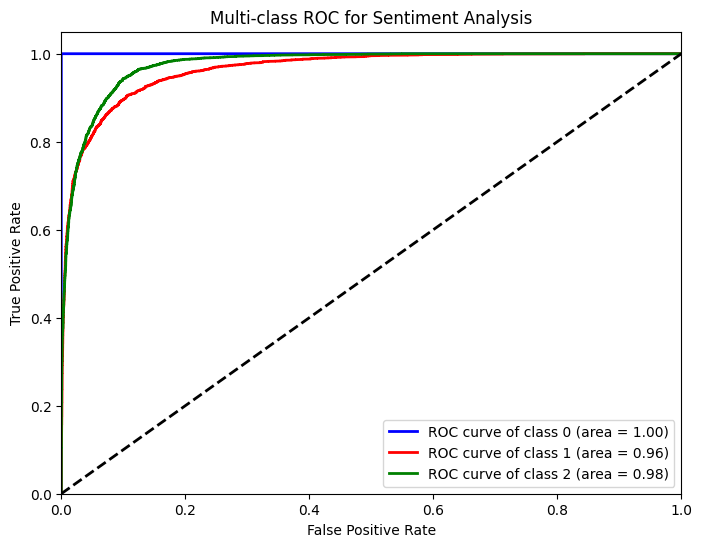

In [48]:

# Binarize the output labels for each class
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# Predict probabilities
y_score = nb_classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))

colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC for Sentiment Analysis')
plt.legend(loc="lower right")
plt.show()


### ROC  AUC
​
​
**ROC AUC** stands for **Receiver Operating Characteristic - Area Under Curve**. It is a technique to compare classifier performance. In this technique, we measure the `area under the curve (AUC)`. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. 
​
​
So, **ROC AUC** is the percentage of the ROC plot that is underneath the curve.

In [49]:


# Binarize the y_test labels for multi-class ROC AUC calculation
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Predict probabilities for each class
y_score = nb_classifier.predict_proba(X_test)

# Compute ROC AUC
# For multi-class, specify 'ovr' for One-vs-Rest or use 'weighted' for weighted averaging
ROC_AUC = roc_auc_score(y_test_binarized, y_score, multi_class='ovr')

print('ROC AUC : {:.4f}'.format(ROC_AUC))


ROC AUC : 0.9797


he AUC (Area Under the Curve) values of the ROC (Receiver Operating Characteristic) curves for each class of your model provide a quantitative measure of its performance in distinguishing between the positive class and the negative classes for each category. Let's interpret these AUC values for your model:

Class 0 (AUC = 1.00):

An AUC of 1.00 for Class 0 indicates perfect discrimination. This means that the model is able to distinguish between Class 0 and the other classes (Class 1 and Class 2) with 100% accuracy.

In practical terms, this suggests that for Class 0, the model has an ideal balance of true positive and true negative rates, with no overlap between the score distributions of the positive class and the negative classes.

Class 1 (AUC = 0.96):

An AUC of 0.96 for Class 1 is very high and indicates excellent model performance in distinguishing between Class 1 and the other classes.

This value suggests that the model has a very high true positive rate and a low false positive rate for Class 1. 

There is a small overlap between the score distributions of Class 1 and the other classes, but it is minimal.

Class 2 (AUC = 0.98):

An AUC of 0.98 for Class 2 also signifies outstanding discrimination ability. The model is highly effective in distinguishing Class 2 from the other classes.

This high AUC value implies that the model correctly identifies Class 2 instances with a high true positive rate while maintaining a low false positive rate.

### Tuning and validation controls

we did Holdout validation which is  divided into two parts. The training set and the testing (or holdout) set. The model is trained on the training set and then evaluated on the unseen testing set.

We could also utilize:

Cross-validation (k-fold) - is dividing the dataset into 'k' subsets (or folds). The model is trained and validated 'k' times, each time using a different fold for validation and the remaining 'k-1' folds for training. It ensures that every data point gets to be in the test set exactly once and in the training set 'k-1' times, providing a more comprehensive assessment of the model's performance. Which basically reduces 'luck' in the validation set which would influence the performance. It is cruscial to choose the right k which depends on the size and nature of the dataset

Leave one out - is a special case of k-fold cross-validation where 'k' equals the number of data points in the dataset. Essentially, for a dataset with 'N' instances, the model is trained 'N' times, each time using one instance for testing and the remaining 'N-1' instances for training. It is used when the dataset is small, and max use of data for training is desired. Everysignle datapoint is used for training and validation. But it can be computationally expensive

# **10. Conclusion** <a class="anchor" id="10"></a>

[Table of Contents](#0.1)



**Exceptional Performance on Class 0 (Neutral):**

With an F1-score of 0.99 and an AUC of 1.00, your model excels at identifying neutral sentiments. This indicates that the model has an ideal balance of precision and recall for Class 0, with virtually no misclassifications.

The model is very good bewteen distinguish from different classe. For Class 1 (Negative) and Class 2 (Positive):

The model also performs very well in distinguishing negative and positive sentiments, as indicated by the high AUC values of 0.96 for Class 1 and 0.98 for Class 2.

The F1-scores for these classes is 0.79 for Class 1 and 0.87 for Class 2

**High Overall Accuracy:**

An overall accuracy of 0.90 demonstrates that the model is generally reliable across all sentiment classes.

**Areas for Improvement**

Class 1 (Negative) Performance:

While still good, the performance on Class 1 is slightly lower compared to the other classes. The F1-score of 0.79 suggests there is some room for improvement, particularly in increasing the recall (0.69) without significantly sacrificing precision (0.93).
Balancing Precision and Recall for Class 2 (Positive):

For Class 2, while the recall is very high (0.97), precision is relatively lower (0.80). This suggests that while the model is adept at identifying most positive sentiments, it also has a higher tendency to misclassify some non-positive sentiments as positive.